In [5]:
import numpy as np

def fixation_star(N: int, lam: float, r: float):
  n = N - 1                    
  if n < 1:
    raise ValueError("Need at least one leaf (N >= 2).")

  d = np.arange(n+1)[::-1]
  i = np.arange(n+1)
  Fst = r*i + d + r
  Fem = r*i + d + 1
  G = r*i + d

  A = lam * (r*d) / (n*Fst) + (1-lam) * (d / N)
  B = lam * (d / Fst) + (1-lam) * (d / (N*G))
  C = lam * ((r*i)/Fst + (r*i)/(n*Fst)) + (1-lam)*(i/N + (r*i)/(N*G))

  with np.errstate(divide="ignore", invalid="ignore"):
    alpha = A / (1 - C)
    beta  = B / (1 - C)

  a = lam*(r*i / Fem) + (1-lam)*(r*i / (N*G))
  c = lam*(i / (n*Fem)) + (1-lam)*(i / N)
  b = 1 - a - c
  with np.errstate(divide="ignore", invalid="ignore"):
    p = a / (1 - b)
    q = c / (1 - b)
  p[0] = q[0] = 0.0

  prod = np.eye(2)
  for idx in range(1, n):
    Mi = np.array([
        [(1 - beta[idx]*p[idx]) / alpha[idx], -(beta[idx]*q[idx]) / alpha[idx]],
        [p[idx], q[idx]],
      ],
      dtype=float,
    )
    prod = Mi @ prod

  r11 = prod[0, 0]              # (A^{(n-1)})_{11}
  Ps1 = 1.0 / r11

  Ps0 = alpha[0] * Ps1
  Pe1 = p[1] * Ps1
  return Ps0, Pe1


if __name__ == "__main__":
    N = 11 
    l = 0.5
    r = 1.2
    Ps0, Pe1 = fixation_star(N, l, r)
    print(f"P^\star_0 = {Ps0:.6f}")
    print(f"P^\empty_1 = {Pe1:.6f}")

P^\star_0 = 0.141383
P^\empty_1 = 0.150629


In [32]:
import pandas as pd
import seaborn as sns
data = []
N = 10
for r in np.arange(0.1, 2.1, 0.01):
  for delta in np.linspace(0, 1, 100+1):
  # for delta in (0, .25, .5, .75, 1):
    ps0, pe1 = fixation_star(N, 1-delta, r)
    data.append((N, r, delta, ps0, 'ps0'))
    data.append((N, r, delta, pe1, 'pe1'))

df = pd.DataFrame(data, columns=['N', 'r', 'delta', 'fp', 'initial_location'])

In [ ]:
# df = df_formula_delta_examples

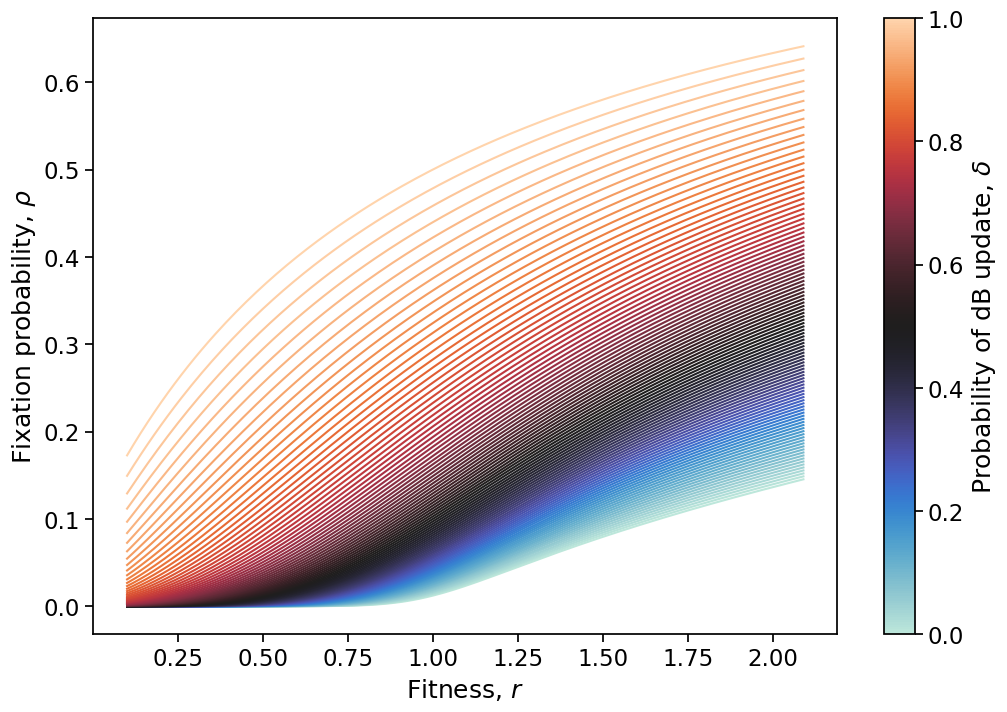

In [42]:
import matplotlib.pyplot as plt
with sns.plotting_context('notebook', font_scale=1.5):
  fig = plt.figure(figsize=(12, 8))
  cmap = sns.color_palette('icefire', as_cmap=True)
  g = sns.lineplot(data=df[df['initial_location']=='ps0'], x='r', y='fp', hue='delta', legend=False, palette=cmap)
  g.set(xlabel='Fitness, $r$', ylabel=r'Fixation probability, $\rho$')
  norm = plt.Normalize(0,1)
  sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
  g.figure.colorbar(sm, ax=g, label=r'Probability of dB update, $\delta$')

In [43]:
g.figure.savefig('pics/star-N10-ps0-formula.svg', transparent=True, dpi=300, bbox_inches='tight')

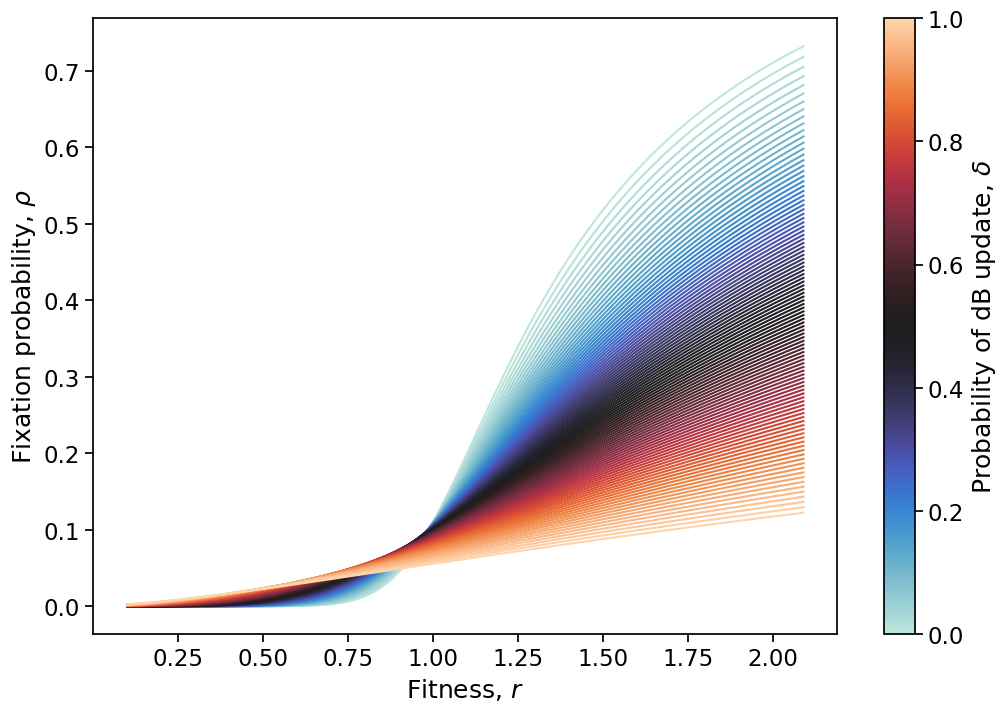

In [44]:
import matplotlib.pyplot as plt
with sns.plotting_context('notebook', font_scale=1.5):
  fig = plt.figure(figsize=(12, 8))
  cmap = sns.color_palette('icefire', as_cmap=True)
  g = sns.lineplot(data=df[df['initial_location']=='pe1'], x='r', y='fp', hue='delta', legend=False, palette=cmap)
  g.set(xlabel='Fitness, $r$', ylabel=r'Fixation probability, $\rho$')
  norm = plt.Normalize(0,1)
  sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
  g.figure.colorbar(sm, ax=g, label=r'Probability of dB update, $\delta$')

In [45]:
g.figure.savefig('pics/star-N10-pe1-formula.svg', transparent=True, dpi=300, bbox_inches='tight')

In [11]:
df_simulation_delta_examples = pd.read_csv('./data/star-10-results-delta-examples.csv')

In [16]:
import matplotlib.pyplot as plt

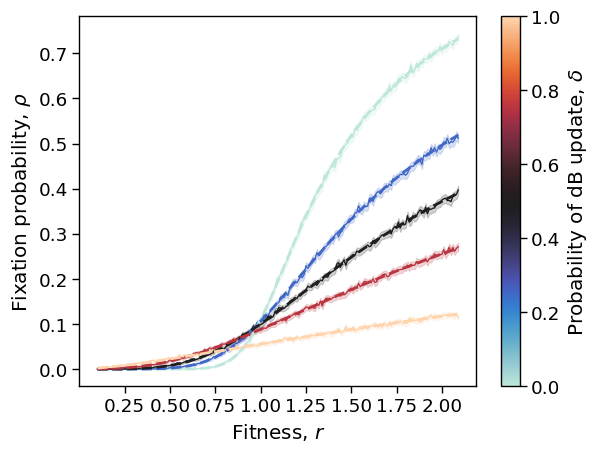

In [28]:
with sns.plotting_context('paper', font_scale=1.5):
  cmap = sns.color_palette('icefire', as_cmap=True)
  g = sns.lineplot(
    data=df_simulation_delta_examples[df_simulation_delta_examples['leaf'] == True],
    x='r',
    y='fixed',
    hue='delta',
    palette=cmap,
    legend=False,
    lw=1,
  )
  sns.lineplot(
    data=df_formula_delta_examples[df_formula_delta_examples['initial_location'] == 'pe1'],
    x='r',
    y='fp',
    hue='delta',
    palette=cmap,
    legend=False,
    linestyle='--',
    lw=2,
  ) 
  g.set(xlabel='Fitness, $r$', ylabel=r'Fixation probability, $\rho$')
  norm = plt.Normalize(0,1)
  sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
  g.figure.colorbar(sm, ax=g, label=r'Probability of dB update, $\delta$')

In [30]:
g.figure.savefig('./pics/star-10-leaf-plot.svg', transparent=True, bbox_inches='tight')

In [47]:
df_neutral = pd.read_csv('./data/star-10-results-neutral.csv')

In [49]:
def star_neutral(N, delta, leaf):
  c = 1-delta if leaf else delta
  denom = (1-delta) * (N-2)**2 + 2*(N-1)
  num = 1 + c * (N-2)
  return num/denom


In [50]:
df_f = pd.DataFrame([
  {
    'delta': delta,
    'leaf': leaf,
    'fp': star_neutral(N, delta, leaf)
  }
  for delta in np.linspace(0, 1, 100+1)
  for leaf in (False, True)
])

/var/folders/nr/wh_xmblj0d57jnlt98fssqqh0000gp/T/ipykernel_36706/1050372922.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.lineplot(


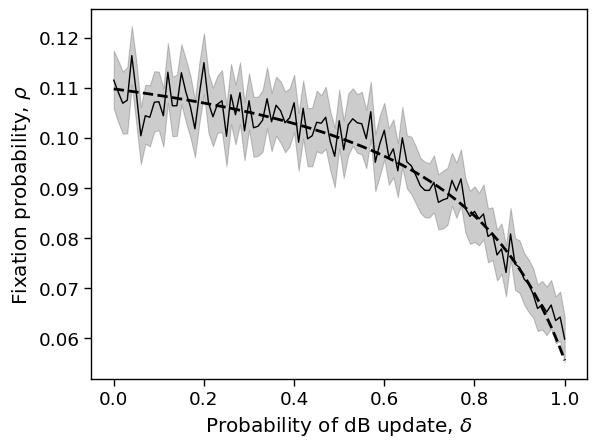

In [62]:
with sns.plotting_context('paper', font_scale=1.5):
  # cmap = sns.color_palette('icefire', as_cmap=True)
  g = sns.lineplot(
    data=df_neutral[df_neutral['leaf'] == True],
    x='delta',
    y='fixed',
    palette=cmap,
    legend=False,
    lw=1,
    color='black',
  )
  sns.lineplot(
    data=df_f[df_f['leaf'] == True],
    x='delta',
    y='fp',
    legend=False,
    linestyle='--',
    lw=2,
    color='black',
  ) 
  g.set(xlabel=r'Probability of dB update, $\delta$', ylabel=r'Fixation probability, $\rho$')
 #  norm = plt.Normalize(0,1)
 #  sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
 #  g.figure.colorbar(sm, ax=g, label=r'Probability of dB update, $\delta$')

In [63]:
g.figure.savefig('./pics/star-10-leaf-plot-neutral.svg', transparent=True, bbox_inches='tight')

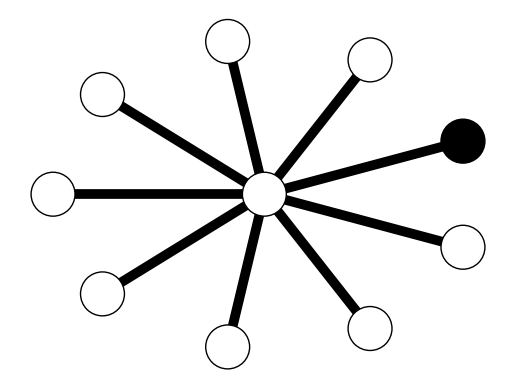

In [59]:
import networkx as nx
fig, ax = plt.subplots()
nx.draw(
  G:=nx.star_graph(9),
  pos=nx.kamada_kawai_layout(G),
  node_color=['white']+['black']+['white']*8,
  edge_color='black',
  edgecolors='black',
  width=7,
  node_size=1000,
  ax=ax,
)
fig.savefig('./pics/star-10-leaf.svg', transparent=True, bbox_inches='tight')